# Linear Regression



<font color="blue"> Jayachandra reddy kamineni  </font>

# Introduction

Objective of this assignment is to build Linear Regression models using Least squares, Least mean squares method and implement them on Linear regression data. Data selected for Regression Analysis is "Housing data of King county, USA". Below is the step by step process followed for building and implementation of Linear regression models. 

1) Data visualization.

2) Data preprocessing.

3) Writing implementation for abstract methods in LinearRegress(LinearModel) model.

4) Writing implementation for abstract methods, train_step(x,t) method in LMS(LinearModel) model.

5) Performing Preliminary test for correct implementation.

6) Dividing data into train set and test set.

7) Training train data using LinearRegress() model. Predicting target variables using use(X) method. Calculating rmse, r squared value for performance measure.

8) Training train data using LMS() model. Predicting target variables using use(X) method. Calculating rmse, r squared value for performance measure.

9) Visualization of results.

10) Analysis of algorithms.

11) Finding most and least significant features of data using OLS model of statsmodels. Performing weight analysis.

12) Eliminating least significant feature and checking for consequences.

13) Eliminating most significant feature and checking for consequences.

14) Residual plots and observation of patterns for goodness of fit.


# Data



## Description

Data selected for this Assignment is "Housing data of King county, USA". It has 21 columns(house features) and 21613 observations. This dataset contains house sale prices of King county. It includes data of houses which are sold within period May 2014 - May 2015.

Description about the house features present in dataset:

id - Unique ID/Notation of house,

date - Date house was sold,

price - Target variable,

bedrooms - No of bedrooms in house,

bathrooms - No of bathrooms in house,

sqft_living - square footage of the home,

sqft_lot - square footage of the lot,

floors - No of floors in house,

waterfront - House which has a view to a waterfront,

view - Has been viewed,

condition - How good the condition is ( Overall ),

grade - Overall grade given to the housing unit, based on King County grading system,

sqft_above - square footage of house apart from basement,

sqft_basement - square footage of the basement,

yr_built - Built Year,

yr_renovated - Year when house was renovated,

zipcode - zip,

lat - Latitude coordinate,

long - Longitude coordinate,

sqft_living15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area,

sqft_lot15 - lotsize area in 2015(implies-- some renovations).

## Plots for understanding or analysis

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Reading data using pandas library
house_data=pd.read_csv('kc_house_data.csv')

In [3]:
# To know shape of data
house_data.shape

(21613, 21)

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


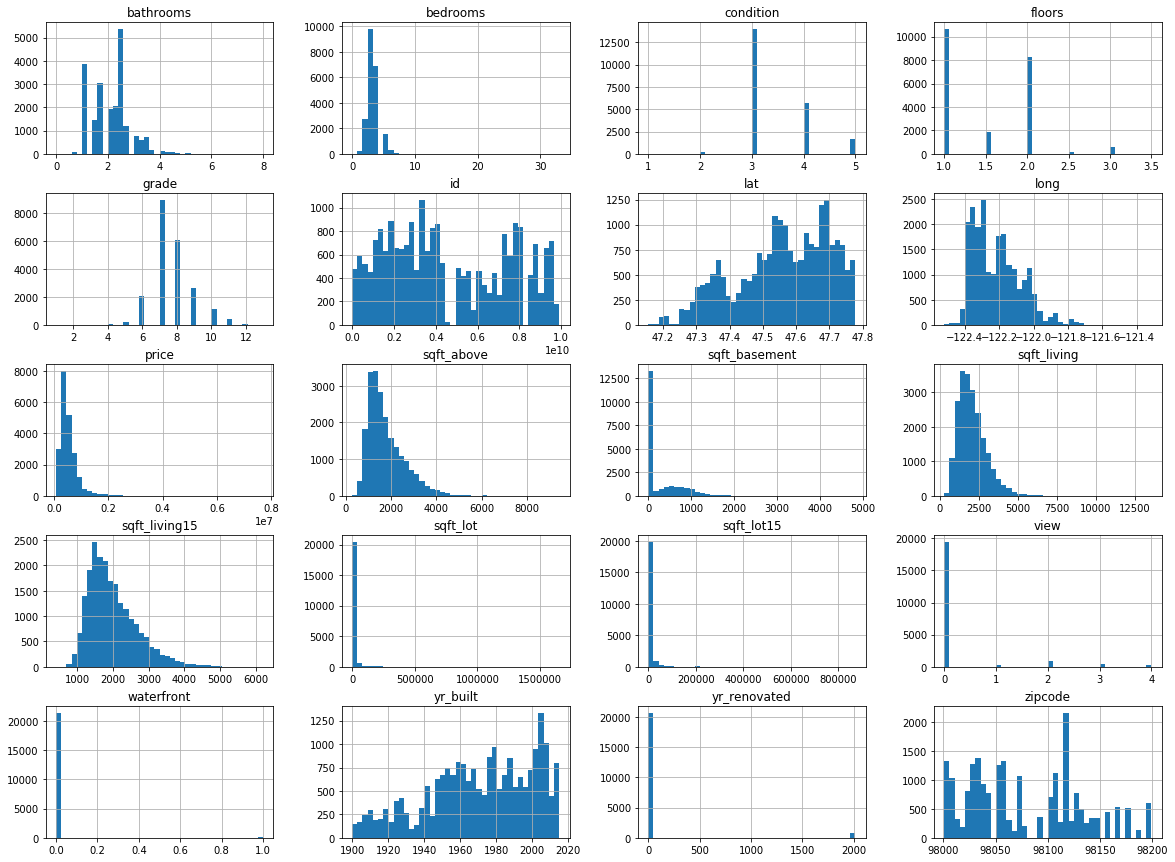

In [5]:
# Overall idea about distribution of data
house_data.hist(bins=40, figsize=(20,15))
plt.show()

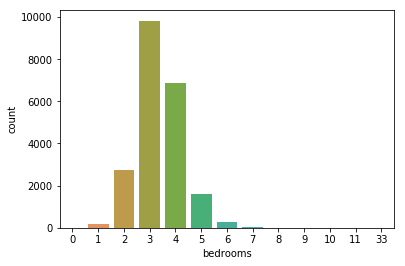

In [6]:
# Count plot of Bedrooms 
sns.countplot(x='bedrooms',data=house_data)

Above plot indicates that houses with 3 bedrooms are most common in King county while houses with 1,7 bedrooms are very uncommon

Text(564.286,0.5,'Longitude')

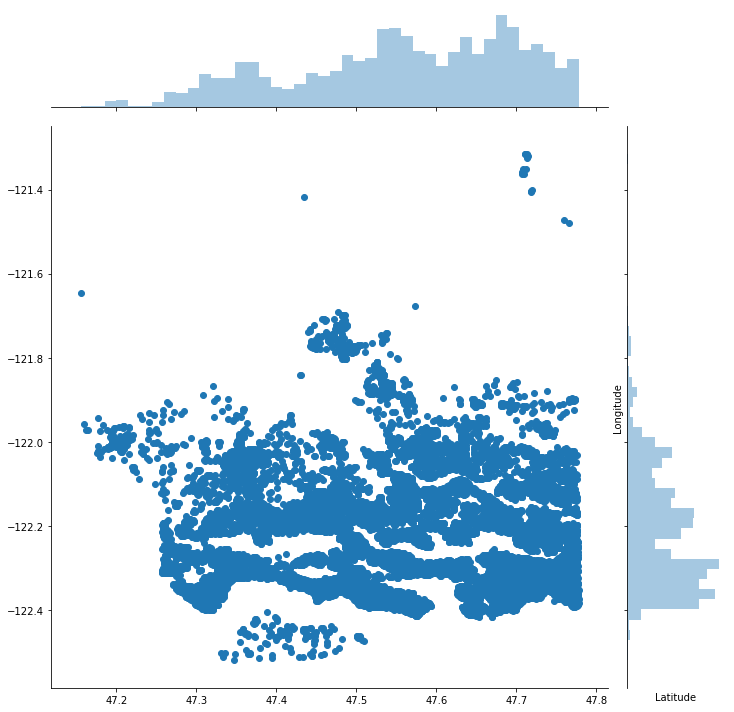

In [7]:
# Joint plot between Latitude on x axis and Longitude on y axis
sns.jointplot(x=house_data.lat.values,y=house_data.long.values,height=10)
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)

Above plot indicates houses are more dense within latititude 47.7 to 47.8 and longitude 122.2 to -122.4

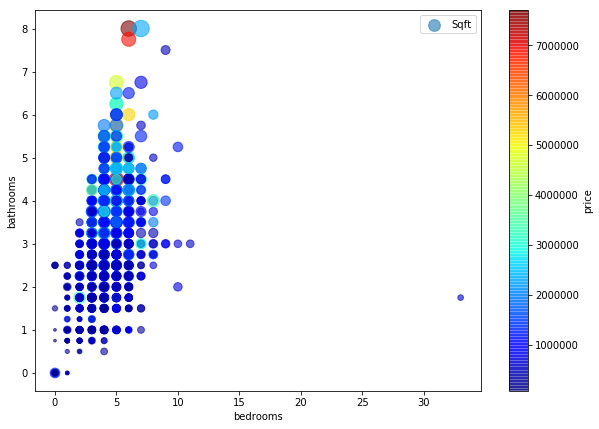

In [8]:
# Scatter plot between bedrooms on x axis and bathrooms on y axis, sqft of living area as size of scatter points, color as price.
fig, ax = plt.subplots()
house_data.plot(kind="scatter",x='bedrooms',y='bathrooms',s=house_data['sqft_living']/50, label="Sqft",alpha=0.6, figsize=(10,7),c="price", cmap=plt.get_cmap("jet"), colorbar=True,ax=ax)

From above plot we can summarise that price of the house is increasing as no of bathrooms, bedrooms increases. As the sqft of living area increases no of bathrooms also increased.

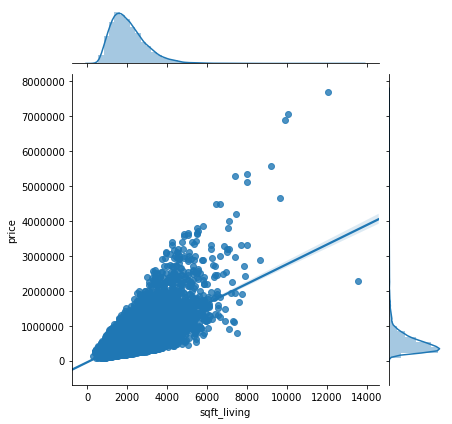

In [9]:
# Jointplot between sqft of living area on x axis and price on y axis
sns.jointplot("sqft_living","price",data=house_data,kind='reg')

Above plot tells that price is directly proportional to sqft of living area with most of the houses built with living area of 500 to 5000 sqft.

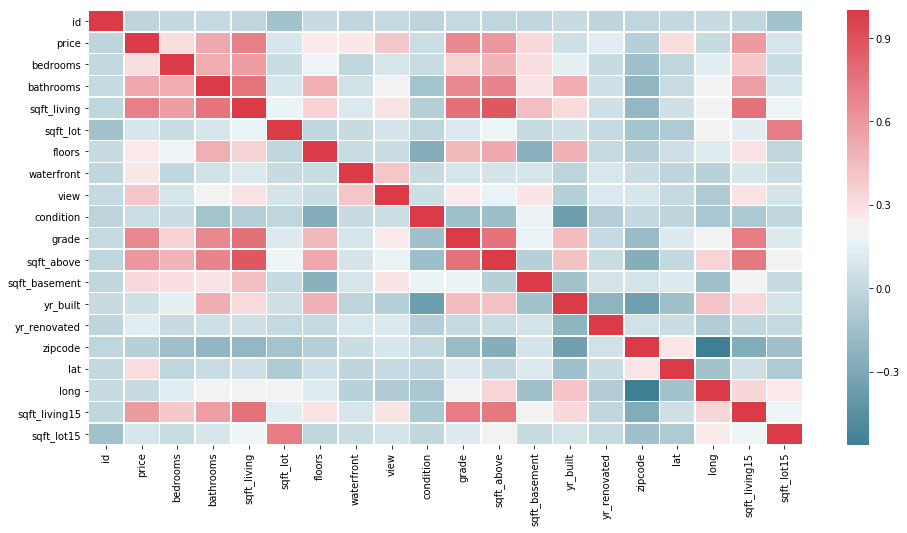

In [10]:
#Correlation heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = house_data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cmap,linewidths=.5)

From the above correlation map we can see that price of the house is positively correlated to sqft living, sqft above, grade of house, waterfront, floors, bathrooms, bedrooms and negetively correlated to age of house, condition of house. From correlation plot it is surprising to see that year built and no of bathrooms, bedrooms are positively correlated to some extent.

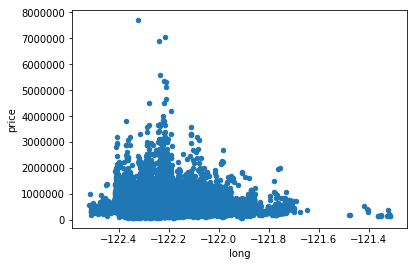

In [11]:
# Scatter plot between Longitude on x axis and price on y axis
house_data.plot(kind='scatter',x="long",y="price")

From above scatter plot we can identify that houses within longitude range -122.1 to -122.4 are more expensive, -121.5 to -121.3 are least expensive.

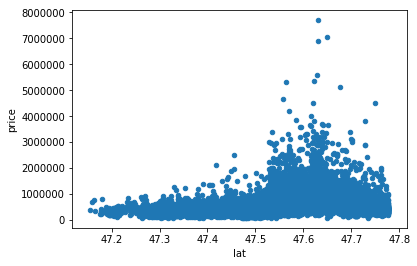

In [12]:
# Scatter plot between latitude on x axis and price on y axis
house_data.plot(kind='scatter',x="lat",y="price")

From above scatter plot we can identify that houses within latitude range 47.5 to 47.75 are expensive, 47.1 to 47.3 are least expensive.

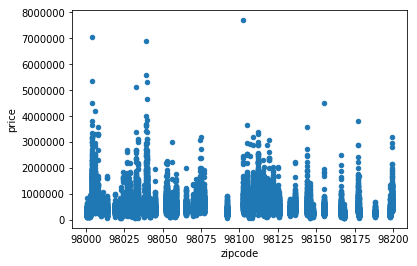

In [13]:
# Scatter plot between zipcode on x axis and price on y axis
house_data.plot(kind='scatter',x='zipcode',y='price')

Above scatter plot tells that houses are more expensive within zipcode range 98000 to 98010 and 98030 to 98040.

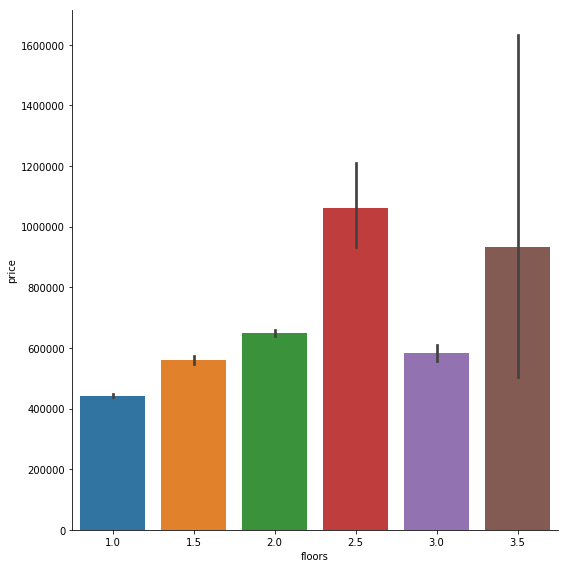

In [14]:
# Catplot between floors on x axis and price on y axis
sns.catplot(data=house_data, x="floors", y="price",height=8,kind='bar')

Above cat plot indicates that on an avg prices of the houses with 2.5 floors are expensive, with 1 floor are least expensive compared to others.

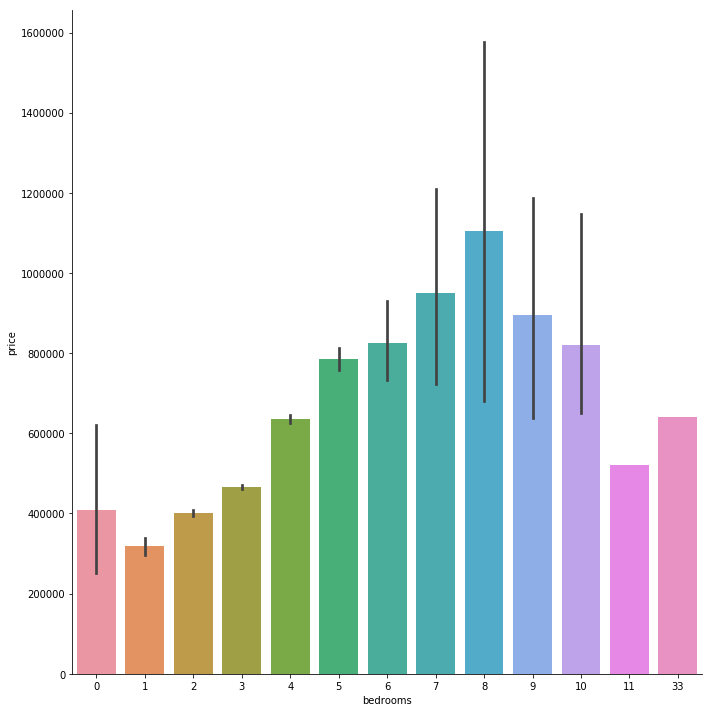

In [15]:
# Catplot between bedrooms on x axis and price on y axis
sns.catplot(data=house_data, x="bedrooms", y="price",height=10,kind='bar')

Above catplot indicates that on an avg prices of houses with 8 bedrooms are expensive compared to others.

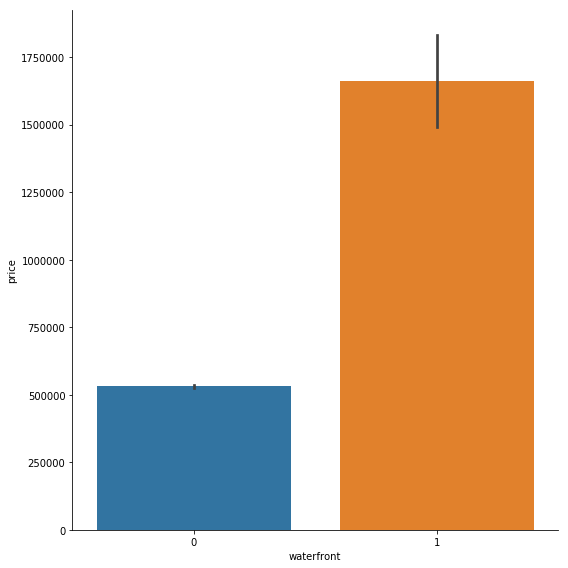

In [16]:
# Catplot between waterfront on x axis and price on y axis
sns.catplot(data=house_data, x="waterfront", y="price",height=8,kind='bar')

Above catplot indicates that houses with waterfront are very expensive compared to no waterfront.

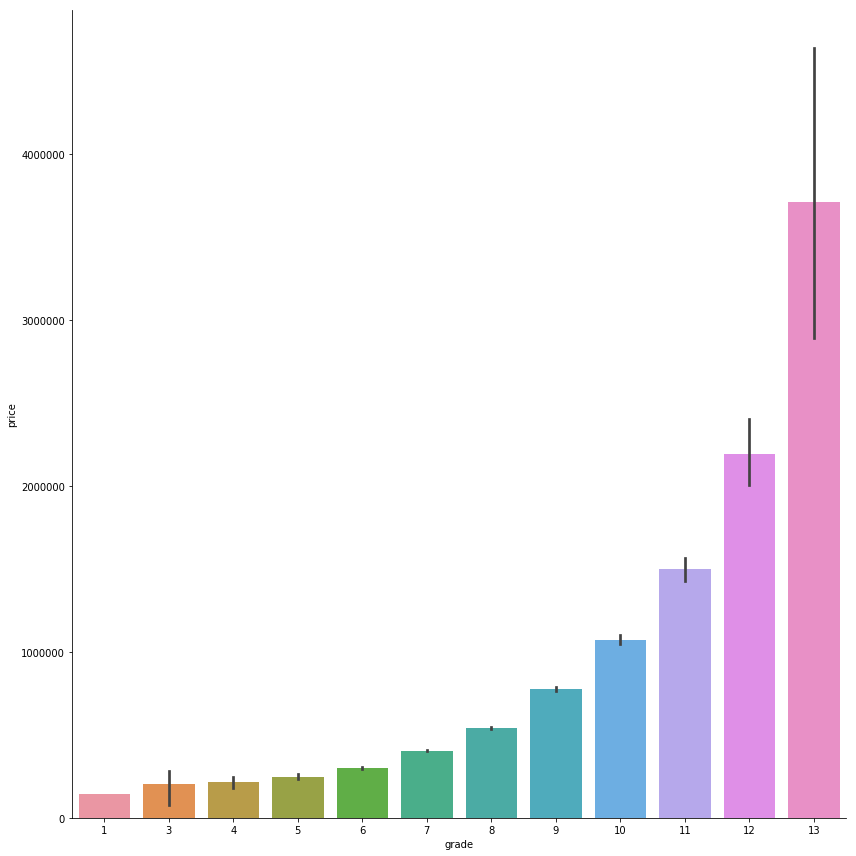

In [17]:
# Catplot between grade on x axis and price on y axis
sns.catplot(data=house_data, x="grade", y="price",height=12,kind='bar')

Above catplot indicates that price of the house is increasing exponentially as the grade of house increases.

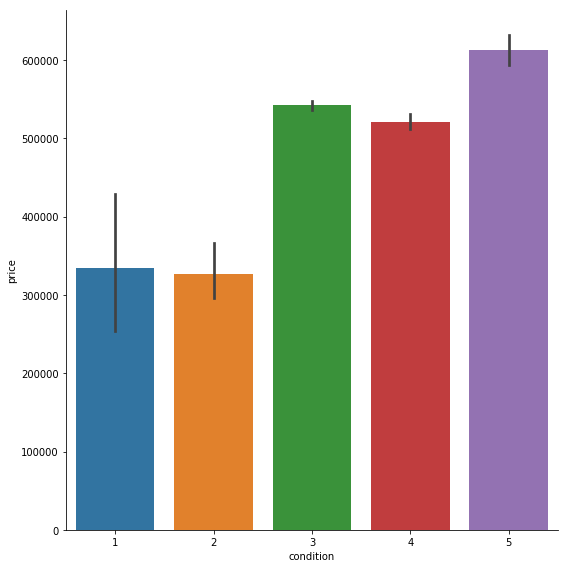

In [18]:
# Catplot between condition on x axis and price on y axis
sns.catplot(data=house_data, x="condition", y="price",height=8,kind='bar')

Above catplot indicates that price is more for the houses with good condition.

## Preliminary observation

Based on the visualizations these are the observations identified. Number of houses with 3 bedrooms are more common in King county with number of houses with 4 bedrooms taking second place and number of houses with 7 bedrooms are very uncommon. Houses are more dense within latititude 47.7 to 47.8 and longitude 122.2 to -122.4. Price of the houses are increasing as no of bathrooms, bedrooms increases. As the sqft of living area increases no of bathrooms also increased. Price of house is directly proportional to sqft of living area with most of the houses have living area of 500 to 5000 sqft. From correlation map we can see that price of the house is positively correlated to sqft living, sqft above, grade of house, waterfront, floors, bathrooms, bedrooms and negetively correlated to age of house, condition of house. From correlation plot it is surprising to see that year built and no of bathrooms, bedrooms are positively correlated to some extent. Houses within longitude range -122.1 to -122.4 are more expensive, -121.5 to -121.3 are least expensive and houses within latitude range 47.5 to 47.75 are expensive, 47.1 to 47.3 are least expensive. It is seen that houses are more expensive within zipcode range 98000 to 98010 and 98030 to 98040. On an avg prices of the houses with 2.5 floors are expensive while houses with 1 floor are least expensive compared to others. On an avg prices of houses with 8 bedrooms are expensive compared to others. Houses with waterfront are very expensive compared to no waterfront. Price of the house is increasing exponentially as the grade of house increases and price is more for the houses with good condition.

## Preprocessing of the data

In [19]:
# function to drop the rows that has null or missing values
house_data=house_data.dropna()

In [20]:
# Data is already clean and has no missing values
house_data.shape

(21613, 21)

In [21]:
#Dropping unwanted columns
house_data=house_data.drop(['id','date'],axis=1)
house_data.shape

(21613, 19)

In [22]:
# Seperating target variable
t=pd.DataFrame(house_data.iloc[:,0])
house_data=house_data.drop(['price'],axis=1)
t

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
5,1225000.0
6,257500.0
7,291850.0
8,229500.0
9,323000.0


In [23]:
house_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X=scaler.fit_transform(house_data)
scaled_T=scaler.fit_transform(t)

In [25]:
scaled_X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [26]:
scaled_T

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

# Method






## Review 

LinearModel(BaseModel):
LinearModel is the base model that has two abstract methods train, use. LinearModel initializes w (weight vector) to None. train function is to train the model and calculate the w(weights vector) and use function is to predict target variable by dotproduct of X and w. It has two other functions add_ones(), check_matrix() which can be used to add ones/column basis to input matrix X. train(self,X,T) function takes two input matrices. X is input matrix of independent variables, T is target variable matrix. use(self,X) takes one input matrix X.

1) Least squares:
LinearRegress(LinearModel) is Linear Regression Class for least squares. It is child class of LinearModel(BaseModel) class. This class has to provide implementation of two abstract methods train(X,T) and use(X). 

train(X,T) function takes two input matrices. Now column of ones is added to input matrix X. Here column of ones is added to create dummy column of ones. w value is calculated using np.linalg.inv(X1.T @ X1) @ X1.T @ T.
use(X) function takes one input matrix and predicts target variable matrix. 
Column of ones is added to input matrix X tp add a dummy column of ones. Target is calculated by dot product of X and w(weight vector)

2) LMS: 
LMS(LinearModel) is Linear Regression class for Least Mean Squares. It is child class of LinearModel(BaseModel) class. This class has to provide implementation of two abstract methods train(X,T) and use(X). 

LMS class takes alpha(learning rate) as an argument while object creation. Alpha is the learning rate of the model. Besides two abstract methods train(X,T), use(X) there is one more function train_step(x,t)  where x is 1d vector where weights vector w is updated for each sample.
train(X,T) function takes two input matrices. w vector is initialized with zeros initially and it gets updated on each iteration.
Now for loop is written inside function to iterate over each sample of X. For each iteration, train_step() function is called passing each row of X,T matrices for each iteration. That means passing X[k,:],T[k] as argument for each iteration. In train_step(x,t) x is a 1d vector and t is the target variable for that particular vector. In train_step(x,t) function  column of one is added to x vector. Now if condition is written for w. If w is None intial weights of zero are initiated to w. Else value of y(target variable) is predicted using existing w value. y is calculated by dot product of w and x. Now value of w(weigths) is adjusted using w -= alpha * (y - t) * x formula, where alpha is learning rate. This update of weights is done for each sample as train_step(x,t) function is called for each sample by train(X,T) function.
use(X) function takes one input matrix and predicts target variable matrix. 
Column of ones is added to input matrix X to add a dummy column of ones. Target matrix is calculated by dot product of X and w(weight vector)

### Super Classs Definition

In [27]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
        
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [28]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
       # print(w)
        y = X1 @ self.w
        return y

## Explanation of codes
LinearRegress(LinearModel) has implementation for two abstract methods train(X,T) and use(X).

train(X,T) funcion takes X,T as input. Now N is no of rows in X matrix. It is calculated using N=X.shape[0]. Now column of ones is added to X and saved as X1 by using the code X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1)))). Now w(weights vector) is calculated using self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T.

use(X) function takes X matrix as input. It calculates value of N to add column of ones to all the rows of X. It is calculated using N=X.shape[0]. Now column of ones is added to X and saved as X1 by using the code X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1)))). Target variable y is calucated by dot product of X1 and w as y = X1 @ self.w .

### Least Mean Squares

In [29]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
   
   
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    
    # batch training by using train_step function
    def train(self, X, T):
        
        
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        self.w = np.zeros(X1.shape[1])
        for k in range(X.shape[0]):
            self.train_step(X[k,:],T[k])
        return self.w
        
        
        
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        
        
        x=np.insert(x,0,1)
        if self.w is None:
            self.w=np.array(np.zeros(x.shape[0]))
        y = (self.w).flatten() @ x
        x=x.reshape(self.w.shape)
        self.w -= self.alpha * (y - t) * x
        
        
        
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        self.w=self.w.reshape(len(self.w),1)
        y = X1 @ self.w

        return y

## Explanation of codes
LMS(LinearModel) class is child class of LinearModel() class. It has implementation for two abstract methods train(X,T) and use(X). This class takes alpha(learning rate) as an argument and initializes alpha value to the value passed when LMS() object is created. Besides two abstract methods train(X,T), use(X) there one more function train_step(x,t) where x is 1d vector. 

train(X,T) function takes two input matrices.  N is no of rows in X matrix. It is calculated using N=X.shape[0]. Now column of ones is added to X and saved as X1 using X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1)))) . w vector is initialized with zeros using np.zeros(X1.shape[1]). Now for loop is written for k in range(X.shape[0]) so that it iterates over each sample of X. For each iteration, train_step(x,t) function is called passing each row of X,T matrices for each iteration. That means each sample of X,T matrices are passed to train_step(x,t) function. X[k,:],T[k] are passed as argument for each iteration using self.train_step(X[k,:],T[k]). In train_step(x,t) x is a 1d vector, t is the target variable for that particular vector. 

In train_step(x,t) function,  column of one is added to x vector using np.insert(x,0,1) where 0 is index of 1d vector. Now if condition is written for w. If w is None intial weights of zero are initiated to w using self.w=np.array(np.zeros(x.shape[0])). Else value of y(target variable) is predicted using existing w value. y is calculated by dot product of w and x as y = (self.w).flatten() @ x. Now value of w(weigths) is adjusted using w -= alpha (y - t) x formula, where alpha is learning rate, y is predicted value, t is actual target value. This update of weights is done for each sample as train_step(x,t) function is called for each sample by train(X,T) function. 

use(X) function takes X matrix as input. It calculates value of N using N = X.shape[0] to add column of ones to X and saved as X1. Target variable y is calucated by dot product X1 and w calculated in train function as y = X1 @ self.w.

# Experiments


## Description of experiment and related codes
First the data is divided into training set and testing set using sklearn.model_selection. From data preprocessing step we got scaled_X and scaled_T matrices. These two matrices are passed as an argument to train_test_split() function with test_size of 0.30 and random state 40. Splitting of data is done by using the code 
X_train,X_test,y_train,y_test = model_selection.train_test_split(scaled_X,scaled_T,test_size=0.30,random_state=40)

Now object lr of LinearRegress() class is created. Now train(X,T) function of LinearRegress model is called to train the model as lr.train(X_train,y_train). Now use(X) function of LinearRegress class is called to calculate the predictions as lr.use(X_test). rmse error is calculated using rmse() function which is defined is preliminary test. R squared error is calculated using r2_score() function which is imported from sklearn.metrics.

Now object lms of LMS() class is created by passing alpha value of 0.001. Now train(X,T) function of LMS model is called to train the model as lms.train(X_train,y_train). Now use(X) function of LMS class is called to calculate the predictions as lms.use(X_test). rmse error is calculated using rmse() function which is defined is preliminary test. R squared error is calculated using r2_score() function which is imported from sklearn.metrics.

In [35]:
# Dividing data into train set and test set
from sklearn import model_selection
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = model_selection.train_test_split(scaled_X,scaled_T,test_size=0.30,random_state=40)

In [36]:
X_train.shape

(15129, 18)

In [37]:
X_test.shape

(6484, 18)

In [38]:
# Implementing LinearRegress() model
lr=LinearRegress()
lr.train(X_train,y_train)
pred_lr=lr.use(X_test)
err_lr=rmse(y_test,pred_lr)
print("RMSE-linear regress ",err_lr)
rsquare_lr = r2_score(y_test, pred_lr)
print("R squared value-linear regress",rsquare_lr)

RMSE-linear regress  44.35609492820323
R squared value-linear regress 0.6818852728163156


Linear regress Model got RMSE score of 44.35, R squared value of 0.6818

In [39]:
# Implementing LMS() Model
lms=LMS(0.001)
lms.train(X_train,y_train)
pred_lms=lms.use(X_test)
err_lms=rmse(y_test,pred_lms)
print("RMSE-LMS ",err_lms)
rsquare_lms = r2_score(y_test, pred_lms)
print("R squared value-LMS ",rsquare_lms)

RMSE-LMS  44.08367051857703
R squared value-LMS  0.6857808406157897


LMS Model got RMSE score of 44.08, R squared value of 0.6857

## Visualization of results

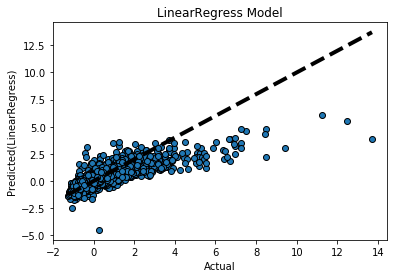

In [40]:
# Prediction of results by LinearRegress Model
fig, ax = plt.subplots()
ax.scatter(y_test, pred_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted(LinearRegress)')
plt.title("LinearRegress Model")
plt.show()


Above plot is visualization of results by LinearRegress model with Actual values on X axis and Predictions on Y axis. From the plot it seems that prediction error increased as Actual value of target variable increased. This model incorrectly predicted more expensive houses.

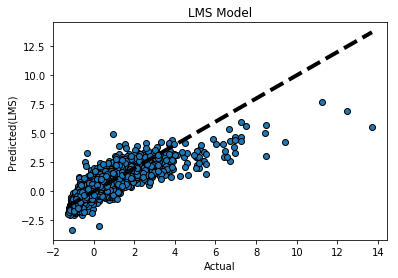

In [41]:
# Prediction of results by LMS Model
fig, ax = plt.subplots()
ax.scatter(y_test, pred_lms, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted(LMS)')
plt.title("LMS Model")
plt.show()

Above plot is visualization of results by LMS model with Actual values on X axis and Predictions on Y axis. From the plot it seems that prediction error increased as Actual value of target variable increased. This model incorrectly predicted more expensive houses. But in comparision to LinearRegress() model it performed better overall and better in predicting more expensive houses.



Text(0.5,1,'LinearRegress Model')

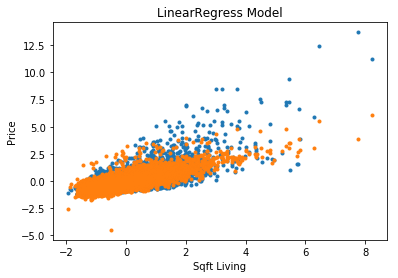

In [42]:
#Visualisation of results vs sqft living by Linear Regress model
#Blue points are actual price, Orange points are predicted points
sqft_test=[]
for i in range(len(X_test)):
    sqft_test.append(X_test[i][2])
plt.plot(sqft_test,y_test,'.',
        sqft_test,pred_lr,'.')
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("LinearRegress Model")

Text(0.5,1,'LMS Model')

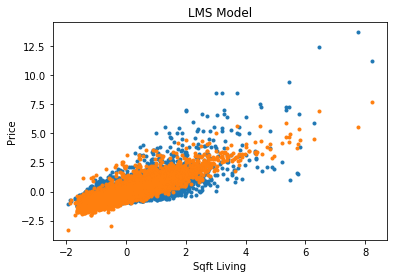

In [43]:
#Visualisation of results vs sqft living by LMS model
plt.plot(sqft_test,y_test,'.',
        sqft_test,pred_lms,'.')
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("LMS Model")

Text(0.5,1,'Linear Regress model predictions')

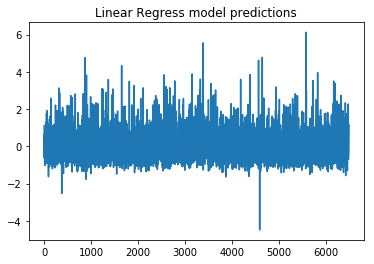

In [44]:
plt.plot(pred_lr)
plt.title("Linear Regress model predictions")

Text(0.5,1,'LMS model predictions')

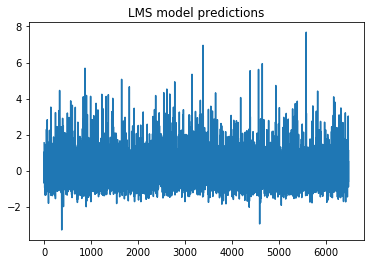

In [45]:
plt.plot(pred_lms)
plt.title("LMS model predictions")

## Analysis/Comparision of algorithms

LinearRegress model and LMS model got almost same rmse, r squared value. rmse value of LinearRegress model is 44.35 where as that of LMS model is 44.08. R squared value of LinearRegress model is 0.6818 where as that of LMS model is 0.6857. Though the performance measures of both the models are almost same LMS model seem to be more promising looking at the Actual vs Predicted visualizations. LinearRegress model very poorly predicted the prices of the houses which are expensive where as LMS models predictions of the houses which are expensive are better in comparision. But LMS model predicted the prices of the houses which are cheaper poorly in comparision to LinearRegress model. LinearRegress models predictions were accurate when actual prices of the houses were low. Both the models follow the same trend and errors are getting larger as prediction moves from smaller to larger value. Larger residuals as prediction moves from small to large also indicates presence of outliers, missing right variables, assymetrical distribution of data. This kind of problem is called Heteroscedasticity. One of the ways of rectifying it is by log transformation. Regression models perform well with symmetrical distribution of data and log transformation convert data into symmetric distribution.

# Conclusions

This assignment helped me to understand the real math behind the Regression models. My own implementation of Linear regression model helped me understand the Least squares and Least mean squares concepts concretely. This assignment also helped me in learning python syntax in depth. I learned plotting of Linear regression results and how it can be helpful in identifying the problems with model. I learned comparing models using rmse, r squared value performance measures. I worked with residual plots which plays key role in observing the fit of the model. I learned how pattern of residual plot can indicate possible flaws in the model. The problem I came across with my model was Heteroscedasticity. I learned how such problems can be rectified using Log transformation. I learned what were the possible causes for such problems. I learned how to find most significant and least significant features of data and consequences the model faces on removal of these features.

The challenges I faced in this assignment are while writing implementation of methods in LinearRegress() and LMS() models. I faced many dimensional issues while calculating dot products between vectors. I also faced difficulties in visulization of Linear model results.

# References

https://www.kaggle.com/

https://www.kaggle.com/harlfoxem/housesalesprediction

https://towardsdatascience.com/

https://machinelearningmastery.com/

https://www.analyticsvidhya.com/

http://scikit-learn.org

http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/

Text book: Hands on Machine learning with scikit learn and Tensorflow

In [46]:
# Using OLS model to find the most and least significant features and perform weight analysis
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2050.
Date:                Thu, 20 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:57:51   Log-Likelihood:                -12571.
No. Observations:               15129   AIC:                         2.518e+04
Df Residuals:                   15112   BIC:                         2.531e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1055      0.006    -17.407      0.000      -0.117      -0.094
x2             0.0906      0.008     10.967      0.000       0.074       0.107
x3             0.2255      0.005     43.122      0.000       0.215       0.236
x4             0.0110      0.006      1.832      0.067      -0.001       0.023
x5             0.0068      0.006      1.071      0.284      -0.006       0.019
x6             0.1429      0.005     28.316      0.000       0.133       0.153
x7             0.1121      0.005     20.646      0.000       0.101       0.123
x8             0.0462      0.005      9.136      0.000       0.036       0.056
x9             0.3027      0.008     36.270      0.000       0.286       0.319
x10            0.2128      0.006     38.270      0.000       0.202       0.224
x11            0.0700      0.005     13.570      0.000       0.060       0.080
x12           -0.2114      0.007    -30.004      0.000      -0.225      -0.198
x13            0.0279      0.005      5.743      0.000       0.018       0.037
x14           -0.0890      0.006    -15.296      0.000      -0.100      -0.078
x15            0.2279      0.005     46.540      0.000       0.218       0.238
x16           -0.0866      0.006    -14.193      0.000      -0.099      -0.075
x17            0.0496      0.008      6.451      0.000       0.035       0.065
x18           -0.0248      0.006     -4.070      0.000      -0.037      -0.013
==============================================================================
Omnibus:                    13376.963   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1574314.073
Skew:                           3.751   Prob(JB):                         0.00
Kurtosis:                      52.408   Cond. No.                     9.65e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.45e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## From the above summary below are the observations i have made regarding most and least significant features.

Least significant feature is x5 as its p value is 0.284 which is highest and above the significant level(0.05). Moreover its coefficient/weight is 0.0068 which is least. Both these values indicate that x5 is least significant feature.

Most significant feature is x15 as its p value is 0.00 which is lower that significant level(0.05) and its coefficient/weight is 0.2279 which is highest. Both these values indicate that x15 is most significant feature.

In [47]:
house_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


x5-least significant feature is floors

x15-most significant feature is latitude

## Eliminating least significant feature and checking the consequences

In [48]:
# Eliminating least significant feature and checking the consequences
X_train_ls=np.delete(X_train,4,1)
X_test_ls=np.delete(X_test,4,1)
X_train_ls.shape,X_test_ls.shape

((15129, 17), (6484, 17))

In [49]:
# Applying LinearRegress model
lr=LinearRegress()
lr.train(X_train_ls,y_train)
pred_ls=lr.use(X_test_ls)
err_lr_ls = rmse(y_test, pred_ls)
print("rmse-linear regress after removing least significant ",err_lr_ls)
rsquare_lr_ls = r2_score(y_test,pred_ls )
print("r squared value-linear regress after removing least significant ",rsquare_lr_ls)

rmse-linear regress after removing least significant  43.89134703586439
r squared value-linear regress after removing least significant  0.6885165429680197


After removing the least significant feature performance measure of the LinearRegress model improved little. RMSE value decreased from 44.35 to 43.89 and R squared value increased from 0.6818 to 0.6885 

In [50]:
# Applying LMS model
lms=LMS(0.001)
lms.train(X_train_ls,y_train)
pred_lms_ls=lms.use(X_test_ls)
err_lms_ls = rmse(y_test, pred_lms_ls)
print("rmse-LMS after removing least significant ", err_lms_ls)
rsquare_lms_ls = r2_score(y_test, pred_lms_ls)
print("r squared value-LMS after removing least significant ", rsquare_lms_ls)

rmse-LMS after removing least significant  44.089578952524
r squared value-LMS after removing least significant  0.6856966068149117


Even after removing the least significant feature performance measure of the LMS model remained same. RMSE value changed from 44.0836 to 44.0895 and R squared value changed from 0.6857 to 0.6856.

## Eliminating most significant feature and checking the consequences

In [51]:
# Eliminating most important feature. x15 is most important feature.
X_train_ms=np.delete(X_train,14,1)
X_test_ms=np.delete(X_test,14,1)
X_train_ms.shape,X_test_ms.shape

((15129, 17), (6484, 17))

In [52]:
# Applying LinearRegress model
lr=LinearRegress()
lr.train(X_train_ms,y_train)
pred_lr_ms=lr.use(X_test_ms)
err_lr_ms = rmse(y_test, pred_lr_ms)
print("rmse-linear regress after removing most significant ",err_lr_ms)
rsquare_lr_ms = r2_score(y_test, pred_lr_ms)
print("r squared value-linear regress after removing most significant ",rsquare_lr_ms)

rmse-linear regress after removing most significant  48.685504999730256
r squared value-linear regress after removing most significant  0.6167549756415247


After removing most significant feature performance measure of LinearRegress model dropped significantly. RMSE value increased from 44.35 to 48.68 and R squared value decreased from 0.68 to 0.616. This is significant drop in performance of the model. 

In [53]:
# Applying LMS model
lms=LMS(0.001)
lms.train(X_train_ms,y_train)
pred_lms_ms=lms.use(X_test_ms)
err_lms_ms = rmse(y_test, pred_lms_ms)
print("rmse-LMS after removing most significant ", err_lms_ms)
rsquare_lms_ms = r2_score(y_test, pred_lms_ms)
print("r squared value-LMS after removing most significant ", rsquare_lms_ms)

rmse-LMS after removing most significant  47.23354028129439
r squared value-LMS after removing most significant  0.6392734040747157


After removing most significant feature performance measure of LMS model dropped significantly. RMSE value increased from 44.08 to 47.23 and R squared value decreased from 0.6857 to 0.6392. This is significant drop in performance of the model.

## Residual plots and observation of patterns for goodness of fit

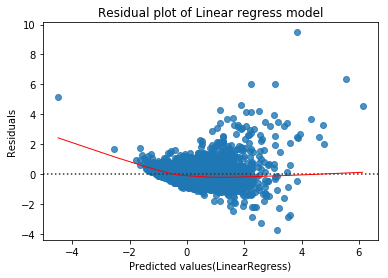

In [54]:
# Residual plot for LinearRegress model
sns.residplot(pred_lr.flatten(), y_test.flatten(), lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot of Linear regress model')
plt.xlabel('Predicted values(LinearRegress)')
plt.ylabel('Residuals');

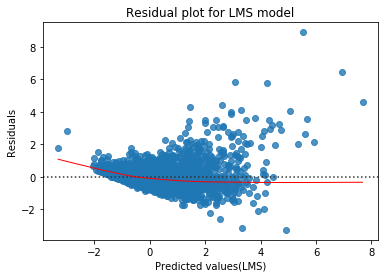

In [55]:
# Residual plot for LMS model
sns.residplot(pred_lms.flatten(), y_test.flatten(), lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot for LMS model')
plt.xlabel('Predicted values(LMS)')
plt.ylabel('Residuals');

From the above two plots it is clear that there is a room for improvement in our model. Postive values of residual mean that prediction was too low and negative value of residual mean that prediction was too high. Residuals of LinearRegress model are very high in comparision to residuals of LMS model as predicted value moves from small to large.

Residuals are getting larger as prediction moves from smaller to larger value. Larger residuals as prediction moves from small to large also indicates presence of outliers, missing right variables, assymetrical distribution of data. This kind of problem is called Heteroscedasticity. One of the ways of rectifying it is by log transformation. Regression models perform well with symmetrical distribution of data and log transformation convert data into symmetric distribution.